In [108]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/CW60jRE0EJw", width=1920/2, height=1080/2)

In [121]:
from qiskit import qiskit
from qiskit.visualization import plot_histogram, plot_state_qsphere
import math
from qiskit.circuit.library import QFT

In [122]:
qft_plus_one = QuantumCircuit(5, name='qft_plus_one')
qft_plus_one.rz(math.pi/16,0)
qft_plus_one.rz(math.pi/8,1)
qft_plus_one.rz(math.pi/4,2)
qft_plus_one.rz(math.pi/2,3)
qft_plus_one.z(4)

qft_plus_one.draw(output="mpl")

plus1_gate = qft_plus_one.to_gate()

In [123]:
qft_plus_three = QuantumCircuit(5, name='qft_plus_three')
qft_plus_three.append(plus1_gate, [0,1,2,3,4])
qft_plus_three.append(plus1_gate, [0,1,2,3,4])
qft_plus_three.append(plus1_gate, [0,1,2,3,4])

plus3_gate = qft_plus_three.to_gate()
cplus3_gate = plus3_gate.control()

In [124]:
qft_gate_norm = QFT(num_qubits=5, approximation_degree=0, do_swaps=False, inverse=False, insert_barriers=False, name='qft_gate_five')
qft_gate_five = qft_gate_norm.to_gate()

In [125]:
qft_gate_inv = QFT(num_qubits=5, approximation_degree=0, do_swaps=False, inverse=True, insert_barriers=False, name='qft_gate_five_inv')
qft_gate_five_inverse = qft_gate_inv.to_gate()

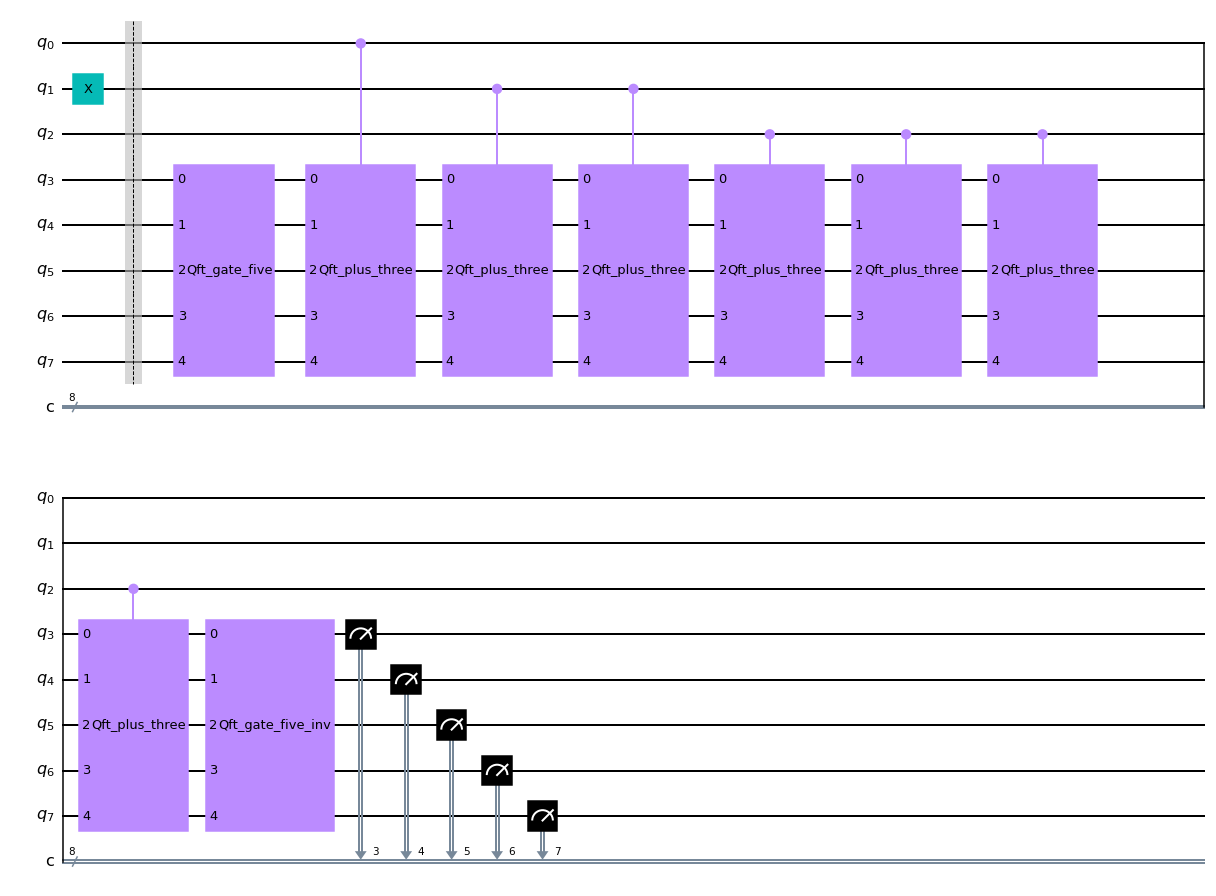

In [126]:
qc = QuantumCircuit(8,8)
qc.x(1)
qc.barrier()
qc.append(qft_gate_norm, [3,4,5,6,7])
qc.append(cplus3_gate, [0,3,4,5,6,7])
qc.append(cplus3_gate, [1,3,4,5,6,7])
qc.append(cplus3_gate, [1,3,4,5,6,7])
qc.append(cplus3_gate, [2,3,4,5,6,7])
qc.append(cplus3_gate, [2,3,4,5,6,7])
qc.append(cplus3_gate, [2,3,4,5,6,7])
qc.append(cplus3_gate, [2,3,4,5,6,7])
qc.append(qft_gate_inv, [3,4,5,6,7])

qc.measure([3,4,5,6,7], [3,4,5,6,7])

qc.draw(output="mpl")

In [127]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [128]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1).result().get_counts()

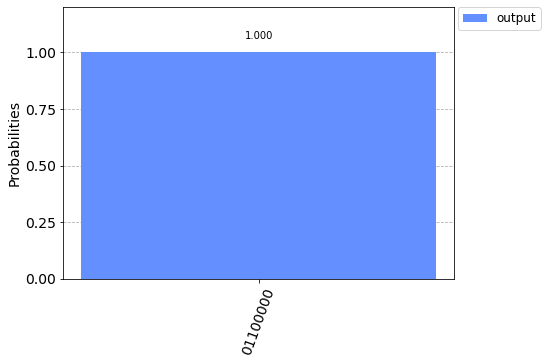

In [129]:
plot_histogram([sim_counts], legend=['output'])

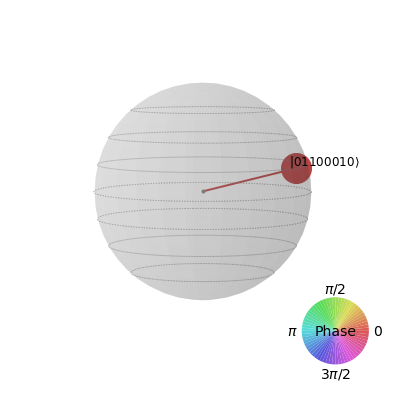

In [130]:
plot_state_qsphere(sim_state_vector)